In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","title","address","phone","datetime","other"]
raw_y_col = ["title","address","phone","datetime","table","client_no","cashier"]
y_col = ["title","address","phone","datetime","other"]
merge_col = ["table","client_no","cashier"]

In [63]:
raw_train_df = pd.read_csv('../text_classification/info_df.csv',   encoding='utf-8')
raw_train_df.head()

,sentence,title,address,phone,datetime,table,client_no,cashier,website
0,DT: 0903915144,0,0,1,0,0,0,0,0
1,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0,0,0
2,"Bình Chánh, TpHCM",0,1,0,0,0,0,0,0
3,ĐT: 0934145879,0,0,1,0,0,0,0,0
4,Ngày: 25/03/2019 Số: 031900002,0,0,0,1,0,0,0,0


In [64]:
def count_pandas(df,row):
    count = 0
    for index,data in df.iterrows():
        if data[row] > 0:
            count+= 1
    return count
#     new_pandas = df.query(row+">0")
#     return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [65]:
# Merge data
train_df = pd.DataFrame(columns = df_col)
for index, row in raw_train_df.iterrows():
    for col in df_col:
        if col != 'other':
            train_df.loc[index,col] = row[col]
        else:
            other = 0
            for mcol in merge_col:
                if row[mcol] == 1:
                    other = 1

            train_df.loc[index,'other'] = other
    

In [66]:
train_df.head()

,sentence,title,address,phone,datetime,other
0,DT: 0903915144,0,0,1,0,0
1,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0
2,"Bình Chánh, TpHCM",0,1,0,0,0
3,ĐT: 0934145879,0,0,1,0,0
4,Ngày: 25/03/2019 Số: 031900002,0,0,0,1,0


In [67]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [68]:
# df.query("brand_name>0")

[21, 35, 30, 35, 33]


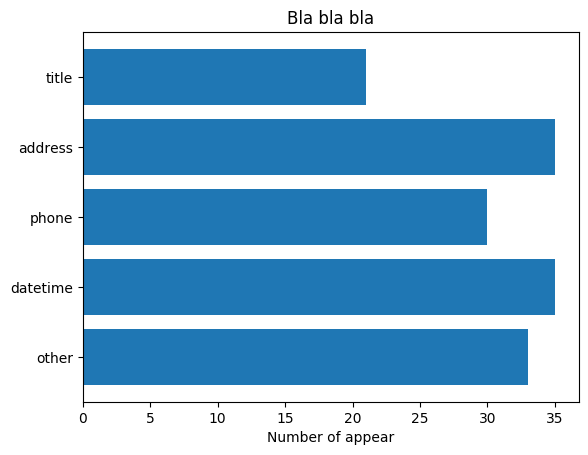

In [69]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [70]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [71]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,title,address,phone,datetime,other
30,DT: 09033d4,0,0,1,0,0
13,"SOH.DON;, 00001-20102014601",0,0,0,0,1
93,Thái Học - TX.Nghĩa Lộ -,0,1,0,0,0
154,0994 0s7 2m +,0,0,1,0,0
92,"44 Dao Duy Tu, Hoan Kiem, Ha Noi Viet nam",0,1,0,0,0


In [72]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[y_col].values

In [73]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (173,)
Shape of Y_train: (173, 5)


In [74]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

DT: 09033d4
(Input->Sentence) Length of X_train: (173,)
(output->Labels) Length of Y_train: (173, 5)
SOH.DON;, 00001-20102014601


In [75]:
# Sum sentence query 
sum_df = pd.read_csv('../text_classification/31-07-vigroupped.csv',   encoding='utf-8')
sum_train = sum_df["sentence"].fillna("fillna").values
texts = sum_train

In [76]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 1196


43

In [77]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (138,)
(output->Labels) Length of Y_train: (138, 5)


In [78]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [79]:
print(X_train[2])
print(X_train_encoded_words[2])
print(Tokenizer.word_index)

Mocha ‹Jc<Eitnidl TU: eo  23LL5Í
[727, 728, 729, 204, 730, 731]
{'000': 1, '1': 2, 'sl': 3, 'hàng': 4, 'tiền': 5, '0': 6, 't': 7, 'giá': 8, 'khách': 9, '10': 10, '30': 11, '2': 12, '5': 13, 'tên': 14, '00': 15, 'giờ': 16, '20': 17, '4': 18, '100': 19, '60': 20, 'đơn': 21, '25': 22, 'sữa': 23, '17': 24, 'ngày': 25, 'lại': 26, 'mặt': 27, '45': 28, '3': 29, 'trà': 30, 'tien': 31, '19': 32, '500': 33, 'thành': 34, '35': 35, 'tiên': 36, '6': 37, '12': 38, '95': 39, '15': 40, 'ơn': 41, '50': 42, 'hoa': 43, 'cam': 44, '40': 45, 'số': 46, 'quý': 47, 'xin': 48, '13': 49, '22': 50, 'trả': 51, 'hà': 52, 'tổng': 53, 'gặp': 54, 'ca': 55, 'phê': 56, 'tra': 57, 'on': 58, 'ban': 59, '8': 60, 'thanh': 61, '—': 62, '80': 63, 'đ': 64, 'rm': 65, 'lai': 66, 'thu': 67, '05': 68, 'đgiá': 69, '90': 70, 'don': 71, '28': 72, '01': 73, 'hen': 74, 'gap': 75, 'cafe': 76, 'dgia': 77, 'dt': 78, '36': 79, '2018': 80, 'công': 81, 'hai': 82, '2017': 83, 'giam': 84, 'toán': 85, '150': 86, 'cốc': 87, 'cà': 88, 'tươi': 89

In [80]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (138, 5)


In [81]:
maxWordCount= 450
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [82]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (138, 450)
(output->Labels) Length of Y_train: (138, 5)


In [83]:
print(Y_train.shape)
print(Y_val.shape)

(138, 5)
(35, 5)


In [84]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(5, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 450, 32)           38272     
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1200)              13200     
_________________________________________________________________
dense_8 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 2505      
Total params: 656,197
Trainable params: 656,197
Non-trainable params: 0
_________________________________________________________________


/home/hung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/home/hung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [85]:
learning_rate=0.0001
epochs = 15
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [86]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(138, 450)
(138, 5)
(35, 450)
(35, 5)


In [87]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

Train on 138 samples, validate on 35 samples
Epoch 1/15
138/138 [==============================] - 1s 10ms/step - loss: 1.4222 - acc: 0.1304 - val_loss: 1.4767 - val_acc: 0.1429
Epoch 2/15
138/138 [==============================] - 1s 5ms/step - loss: 1.3997 - acc: 0.2391 - val_loss: 1.4687 - val_acc: 0.2857
Epoch 3/15
138/138 [==============================] - 1s 5ms/step - loss: 1.3328 - acc: 0.3478 - val_loss: 1.5446 - val_acc: 0.1714
Epoch 4/15
138/138 [==============================] - 1s 5ms/step - loss: 1.1746 - acc: 0.3768 - val_loss: 1.4336 - val_acc: 0.2571
Epoch 5/15
138/138 [==============================] - 1s 5ms/step - loss: 0.9768 - acc: 0.4855 - val_loss: 1.0412 - val_acc: 0.4857
Epoch 6/15
138/138 [==============================] - 1s 5ms/step - loss: 0.8326 - acc: 0.5870 - val_loss: 1.1978 - val_acc: 0.4000
Epoch 7/15
138/138 [==============================] - 1s 5ms/step - loss: 0.6409 - acc: 0.6594 - val_loss: 1.2561 - val_acc: 0.4571
Epoch 8/15
138/138 [==========

In [88]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

35/35 [==============================] - 0s 1ms/step
Test accuracy: 0.6285714294229235 %


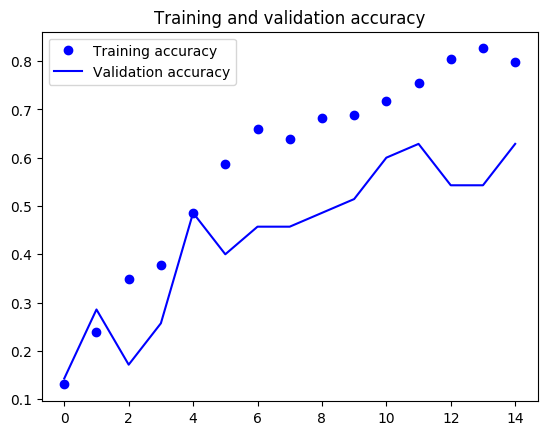

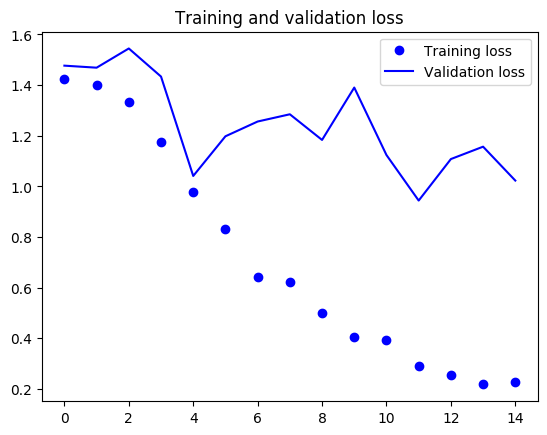

In [89]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
phrase = "Thank you"
tokens = Tokenizer.texts_to_sequences([phrase])
print(tokens)
tokens = pad_sequences(tokens, maxlen=450)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = y_col
print("Result:",total_possible_outcomes[j])

[[224, 225]]
0.46573317
[2]
Result: phone


In [91]:
# serialize model to JSON
# model_json = model.to_json()
# with open("info_model.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("info_model.h5")
# print("Saved model to disk")

# with open('info_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)